# OZG-Umfrage

Fragestellung: Wieviele Fundstellen werden nach der Eingabe "OZG" in der Ergebnisliste angeboten?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [10]:
sammeldict = {'kein Treffer': [], 
               '>11 Treffer': [],
               '1-2 Treffer': [], 
               '3-10 Treffer': []
              }

with open('umfrage-ozg.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='|')
    for row in readCSV:        
        k = int(row[2])
        if k == 0:
            sammeldict['kein Treffer'].append(k)
        elif k ==1 or k ==2:
            sammeldict['1-2 Treffer'].append(k)
        elif k >=3 and k <=10:
             sammeldict['3-10 Treffer'].append(k)
        elif k >= 11:
              sammeldict['>11 Treffer'].append(k)
                
len(sammeldict['kein Treffer']) \
+ len(sammeldict['1-2 Treffer']) \
+ len(sammeldict['3-10 Treffer']) \
+ len(sammeldict['>11 Treffer'])
for i in sammeldict:
    print(len(sammeldict[i]))

178
2
59
17


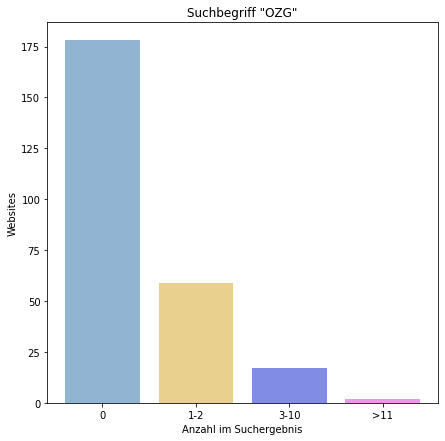

In [3]:
plt.rcParams["figure.figsize"] = (7,7)
fig, ax = plt.subplots()


kategorien = ('0', '1-2', '3-10', '>11')
counter = [len(sammeldict['kein Treffer']),
    len(sammeldict['1-2 Treffer']),
    len(sammeldict['3-10 Treffer']),
    len(sammeldict['>11 Treffer'])
]
y_pos = np.arange(len(kategorien))
farben = ['steelblue', '#dbb243', '#2e42d3', '#e54fe3', '#f23434']

plt.title('Suchbegriff "OZG"')
plt.ylabel('Websites')
plt.xlabel("Anzahl im Suchergebnis")

plt.bar(y_pos, counter, align='center', alpha=0.6, color=farben)

ax.set_xticks(range(len(kategorien)))
ax.set_xticklabels(kategorien)

plt.show()

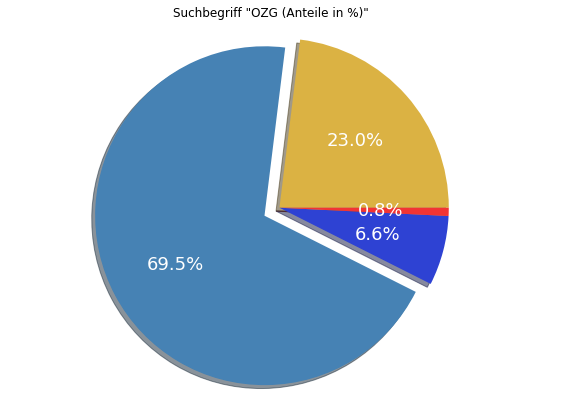

In [4]:
plt.rcParams["figure.figsize"] = (7,7)
plt.style.use('seaborn-bright')
plt.title('Suchbegriff "OZG (Anteile in %)"')
labels = ('kein Treffer', '1-2 Treffer', '2-10 Treffer', '>11 Treffer')
counter = [len(sammeldict['1-2 Treffer']),
           len(sammeldict['kein Treffer']),
           len(sammeldict['3-10 Treffer']),
           len(sammeldict['>11 Treffer'])
          ]
farben = ['#dbb243', 'steelblue', '#2e42d3', '#f23434', '#e54fe3',  ]
explode = (0, 0.1, 0, 0)

plt.pie(counter,              
        labels=labels,      
        colors=farben,      
        autopct='%1.1f%%',  
        shadow=True,        
        startangle=0,
        textprops=dict(color="w",
                       size=18),
       explode=explode)     

plt.axis('equal')

plt.show()